### 8. Znajdowanie stanu stacjonarnego - macierzowe

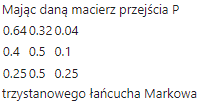

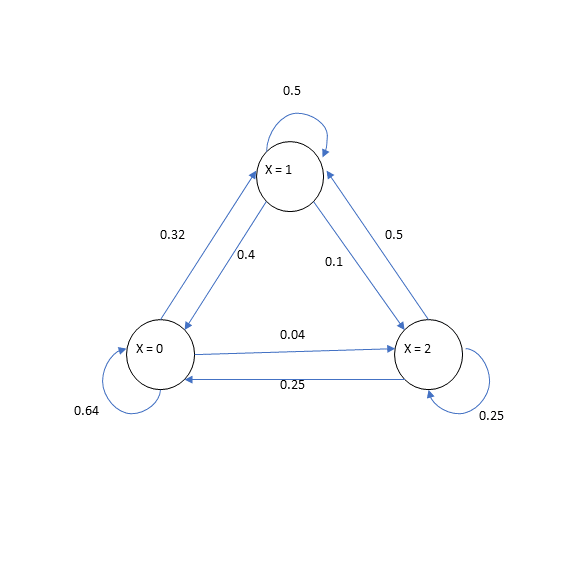

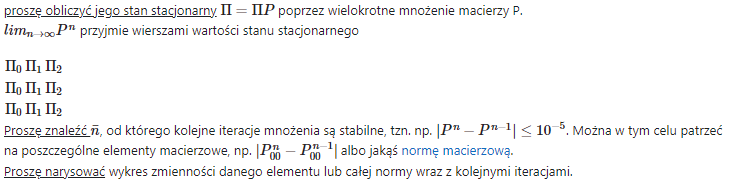

In [1]:
import numpy as np

In [5]:
P = np.array([
    [0.64, 0.32, 0.04],
    [0.4, 0.5, 0.1],
    [0.25, 0.5, 0.25]
])
print(P,"\n\n", P.shape)

[[0.64 0.32 0.04]
 [0.4  0.5  0.1 ]
 [0.25 0.5  0.25]] 

 (3, 3)
